# Importing packages and loading dataset into the environment.

In [8]:
import pandas as pd

In [10]:
data=pd.read_csv('sales_data_with_discounts.csv') # loading the datadset

In [12]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


Identifying numerical columns in the dataset

In [56]:
numerical_columns=data.select_dtypes(include=['number'])

 displaying the columns which are numeric

In [58]:
print("here we have numerical columns of our dataset")

here we have numerical columns of our dataset


In [32]:
data.describe()#useful method for obtaining a quick statistical summary of the numerical columns in a DataFrame.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [60]:
print(numerical_columns) #in a list format

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  
0   

# Calculating mode, median, mean, and standard deviation

In [62]:
results = {
    'Mode': numerical_columns.mode().iloc[0],  # Mode may return multiple values, take the first
    'Median': numerical_columns.median(),
    'Mean': numerical_columns.mean(),
    'Standard Deviation': numerical_columns.std()
}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

print(results_df)

                           Mode       Median          Mean  Standard Deviation
Volume                 3.000000     4.000000      5.066667            4.231602
Avg Price            400.000000  1450.000000  10453.433333        18079.904840
Total Sales Value  24300.000000  5700.000000  33812.835556        50535.074173
Discount Rate (%)      5.007822    16.577766     15.155242            4.220602
Discount Amount       69.177942   988.933733   3346.499424         4509.902963
Net Sales Value      326.974801  4677.788059  30466.336131        46358.656624


# brief interpretation 
Overall, the statistics reveal a dataset with significant variability across all metrics. The presence of high standard deviations indicates that while some products perform well, many others do not, leading to skewed averages. This suggests a need for targeted strategies to improve sales for lower-performing SKUs and to further analyze pricing and discount strategies to optimize revenue generation.

# Data Visualization

Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

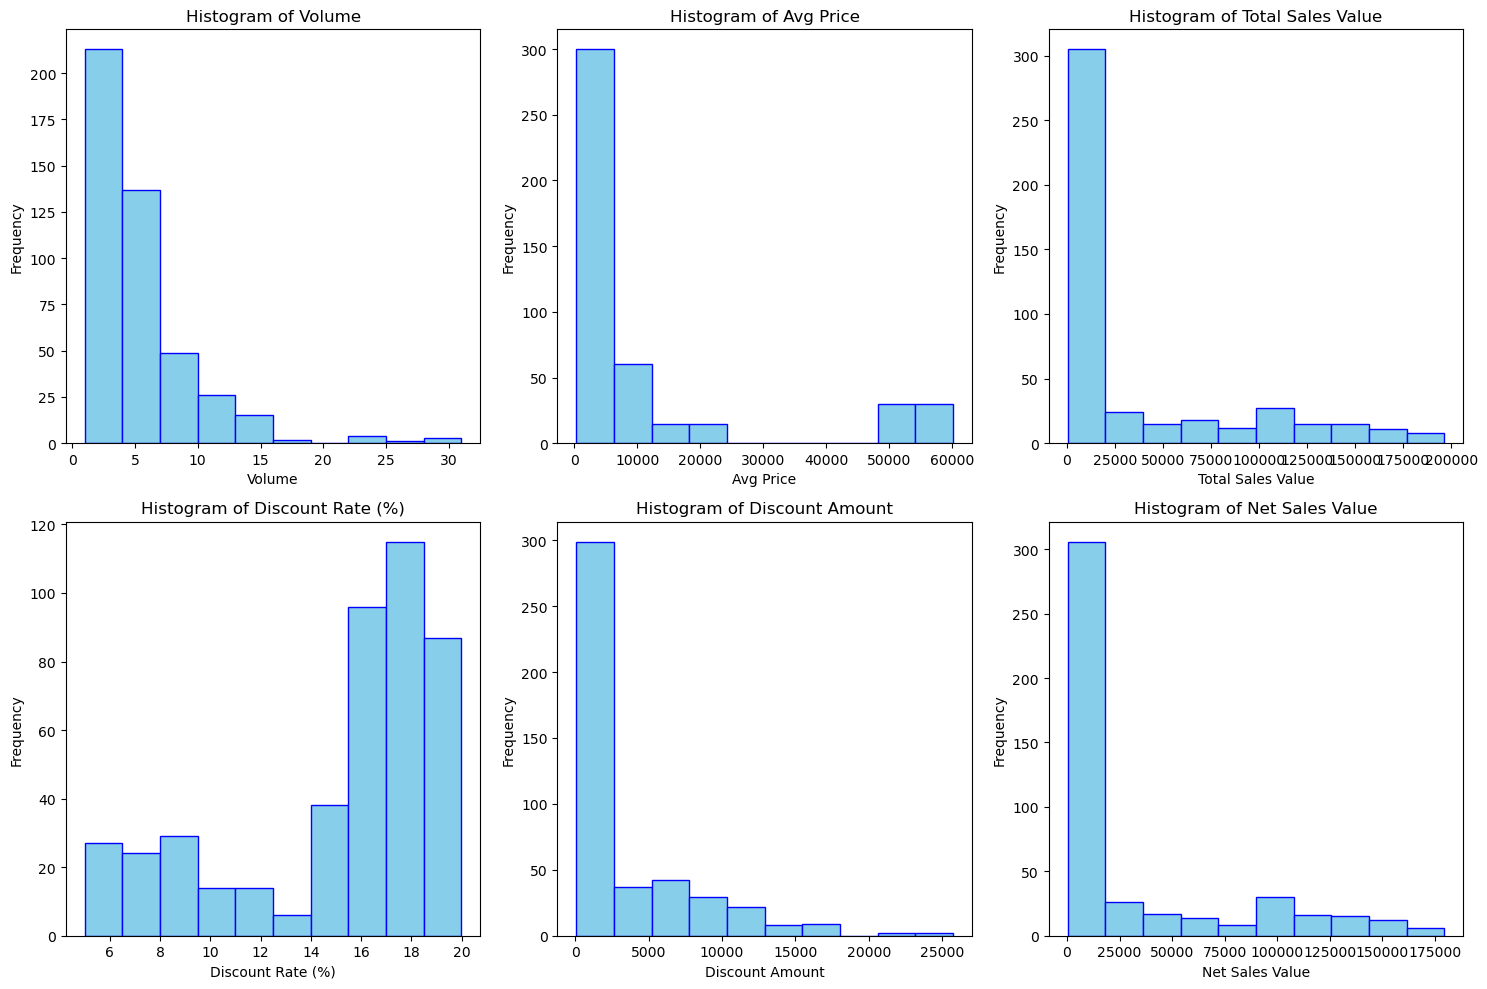

In [79]:
import matplotlib.pyplot as plt   # importing matplot library for visualization
df = pd.DataFrame(data)

# Plotting histograms
num_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Skewness: Most numerical columns exhibit right-skewed distributions, indicating that a small number of high-value items are influencing the averages significantly.
Outliers: The presence of outliers in pricing, sales values, and discounts suggests that a few products are performing exceptionally well, while many others lag behind.

# Boxplots:

In [ ]:
# 	Creating boxplots for numerical variables to identify outliers and the interquartile range.

In [84]:
import seaborn as sns #using this library for enhancing the plots
sns.set(style="whitegrid")

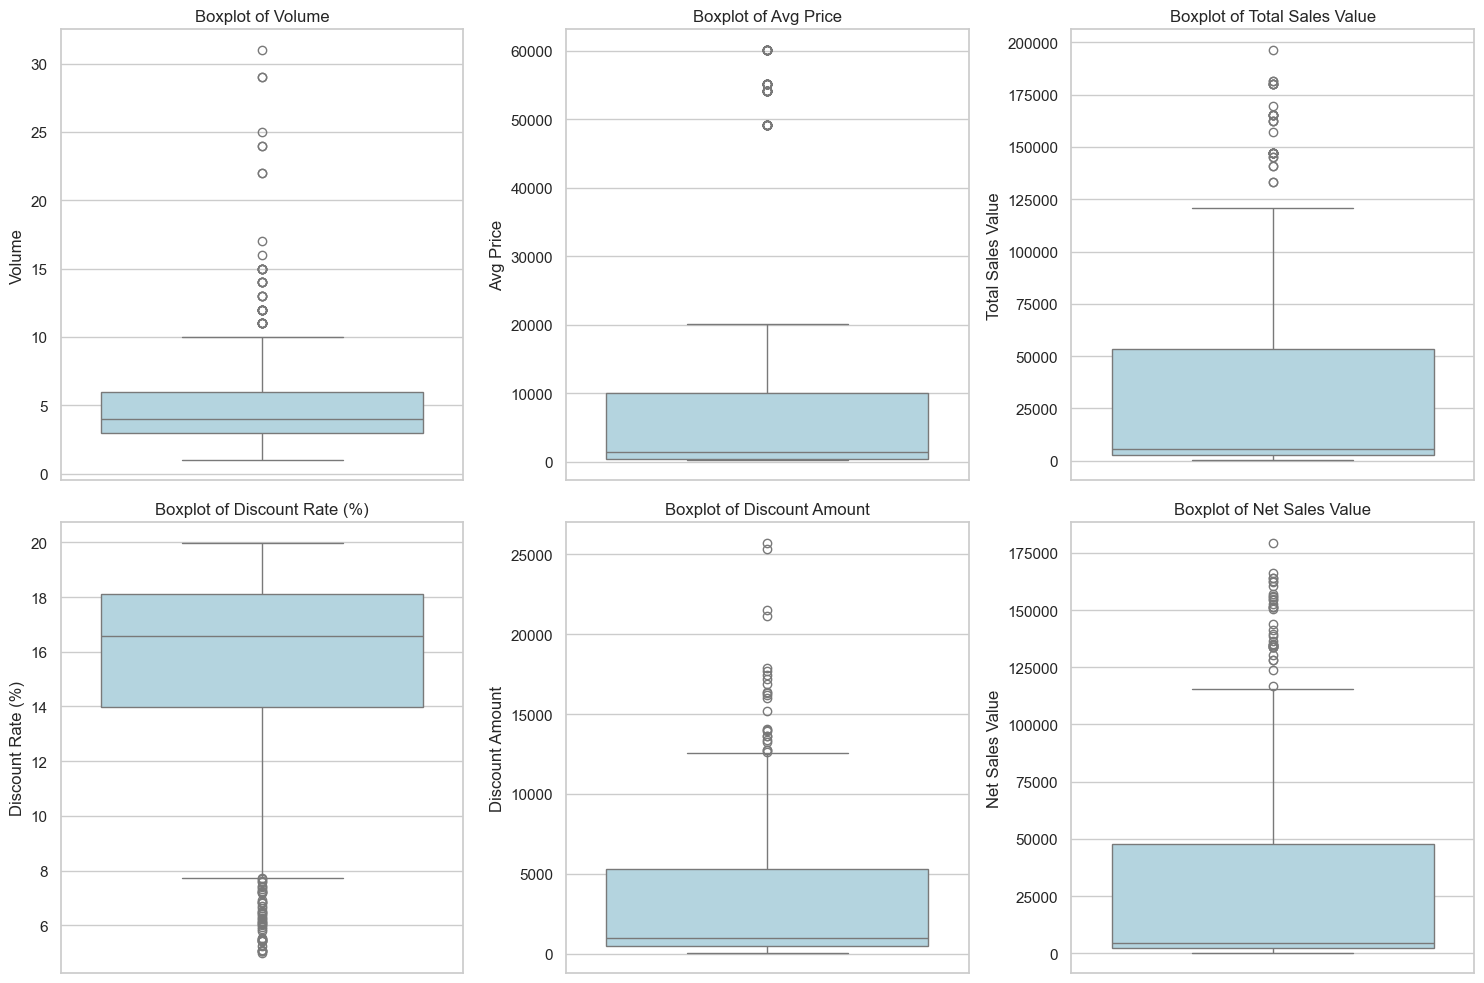

In [110]:
# Plotting boxplots
plt.figure(figsize=(15, 10))

num_columns = df.select_dtypes(include=['number']).columns

for i, column in enumerate(num_columns, 1):  # using enumerate function to retrieve index and value each time
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


in above boxplots visualizations we can easily find there are outliers in every dimension or in every boxplot,avg pricce box plot is having less outliers compared to other plots

In [116]:
categorical_columns=data.select_dtypes(include=['object','category']).columns

In [118]:
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

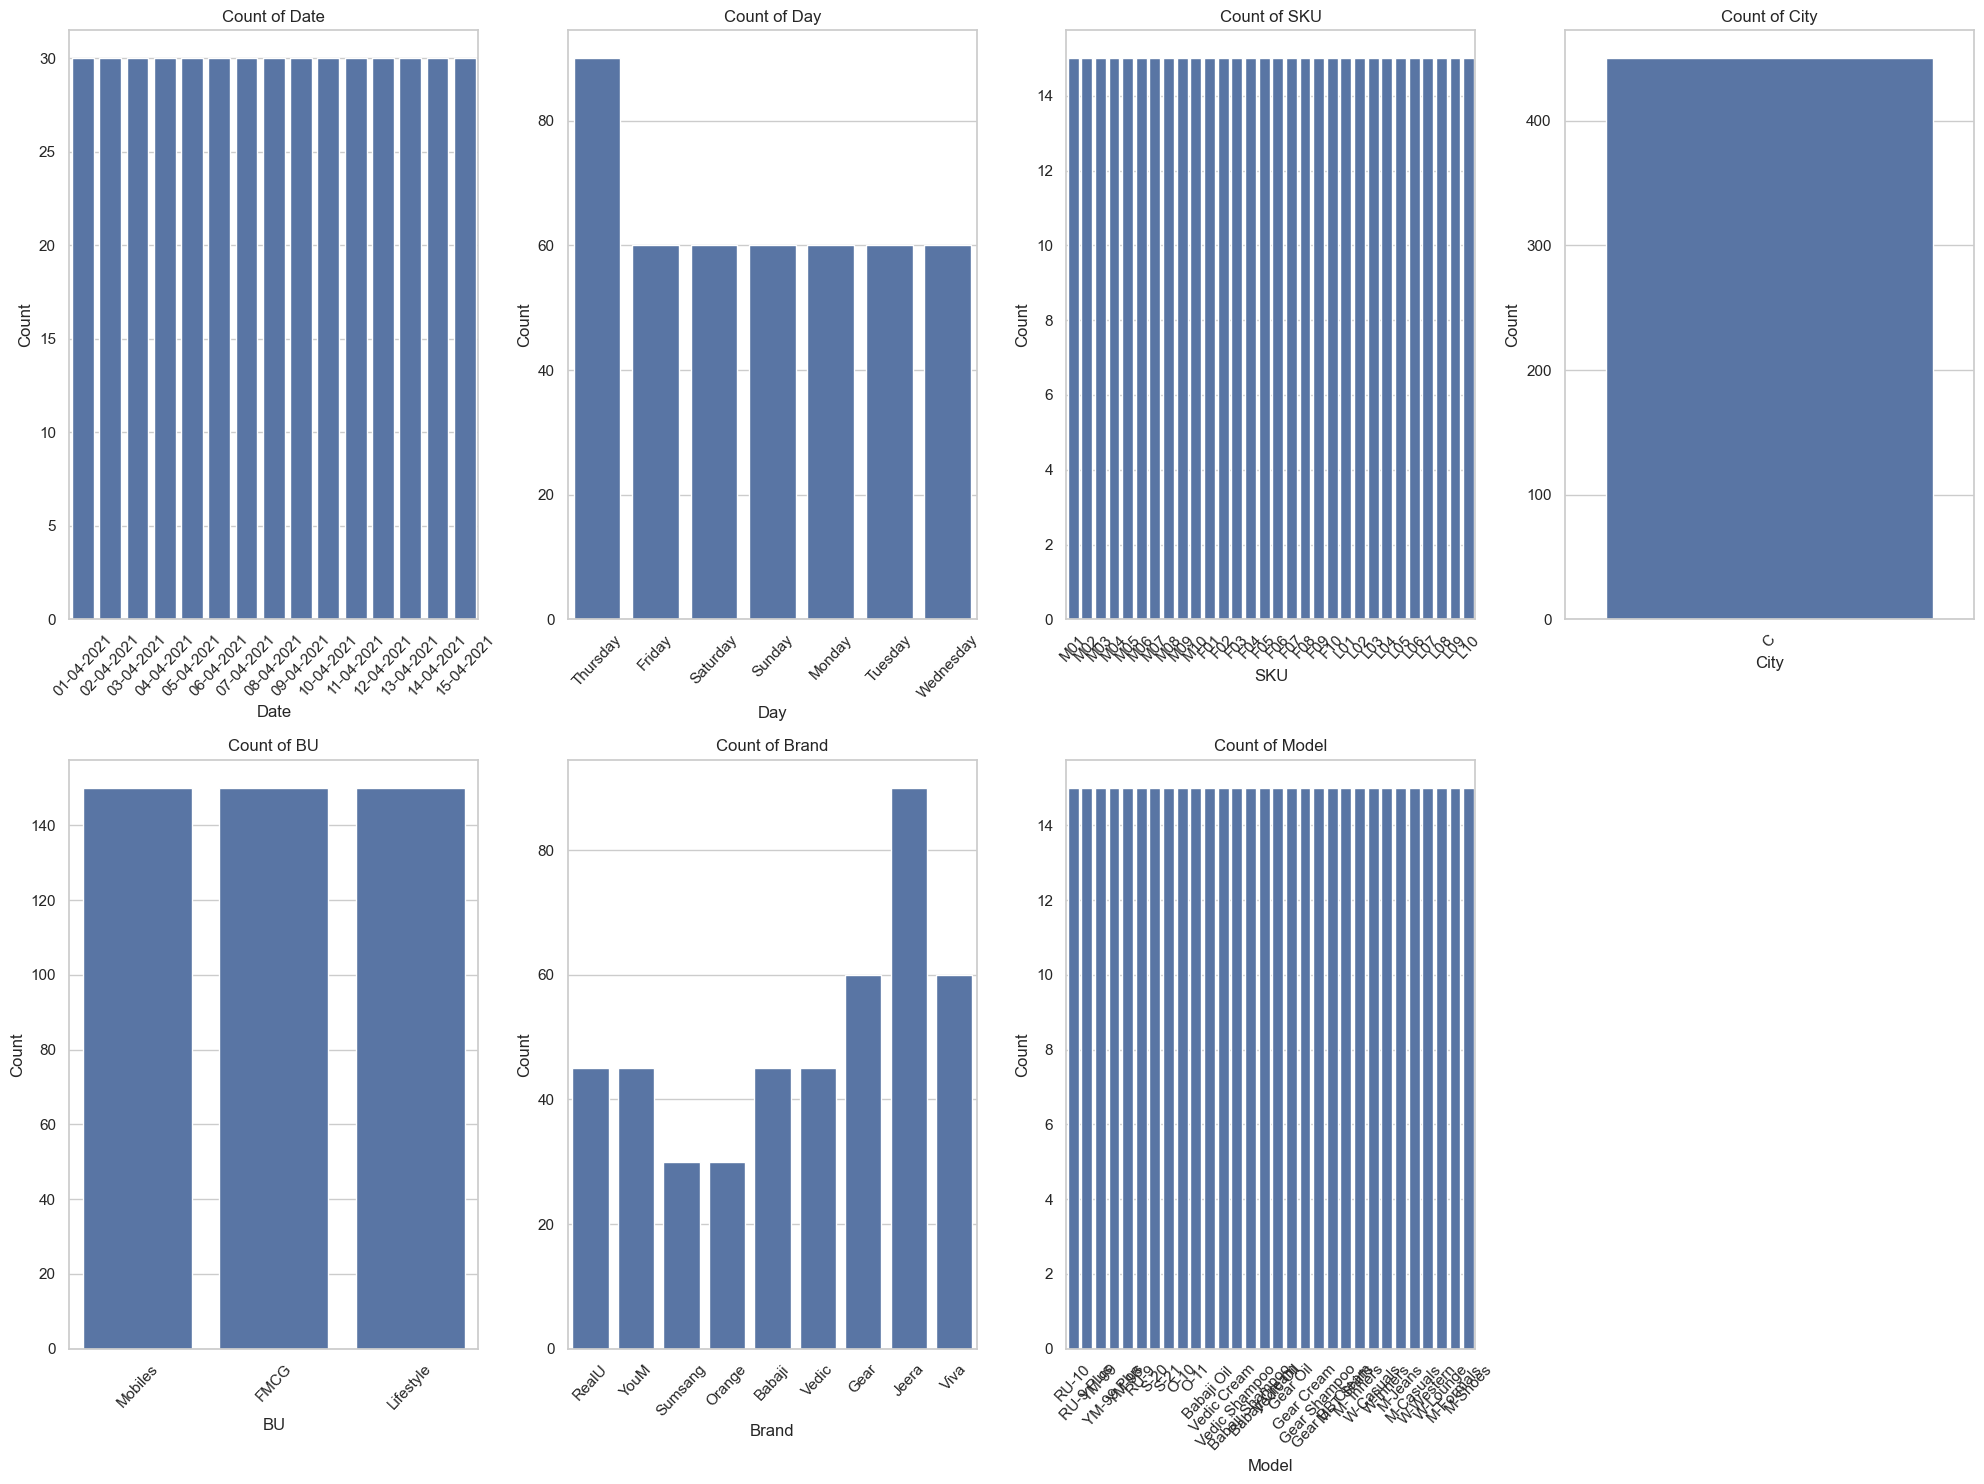

In [149]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=47)  # Rotating x labels for better readability
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

By analyzing the distribution of categories, we gain valuable insights into customer preferences, market trends, and potential areas for growth. This information can guide strategic decisions, such as inventory management, marketing focus, and product development.

# Concept of Standardization (Z-Score Normalization)
Standardization, also known as Z-score normalization, is a statistical technique used to transform numerical data into a standard format. The primary goal is to center the data around the mean and scale it based on the standard deviation. The formula for standardization is:

z=(x−μ)/σ​
 
Where:

z is the standardized value (Z-score).

x is the original value.

μ is the mean of the variable.

σ is the standard deviation of the variable.

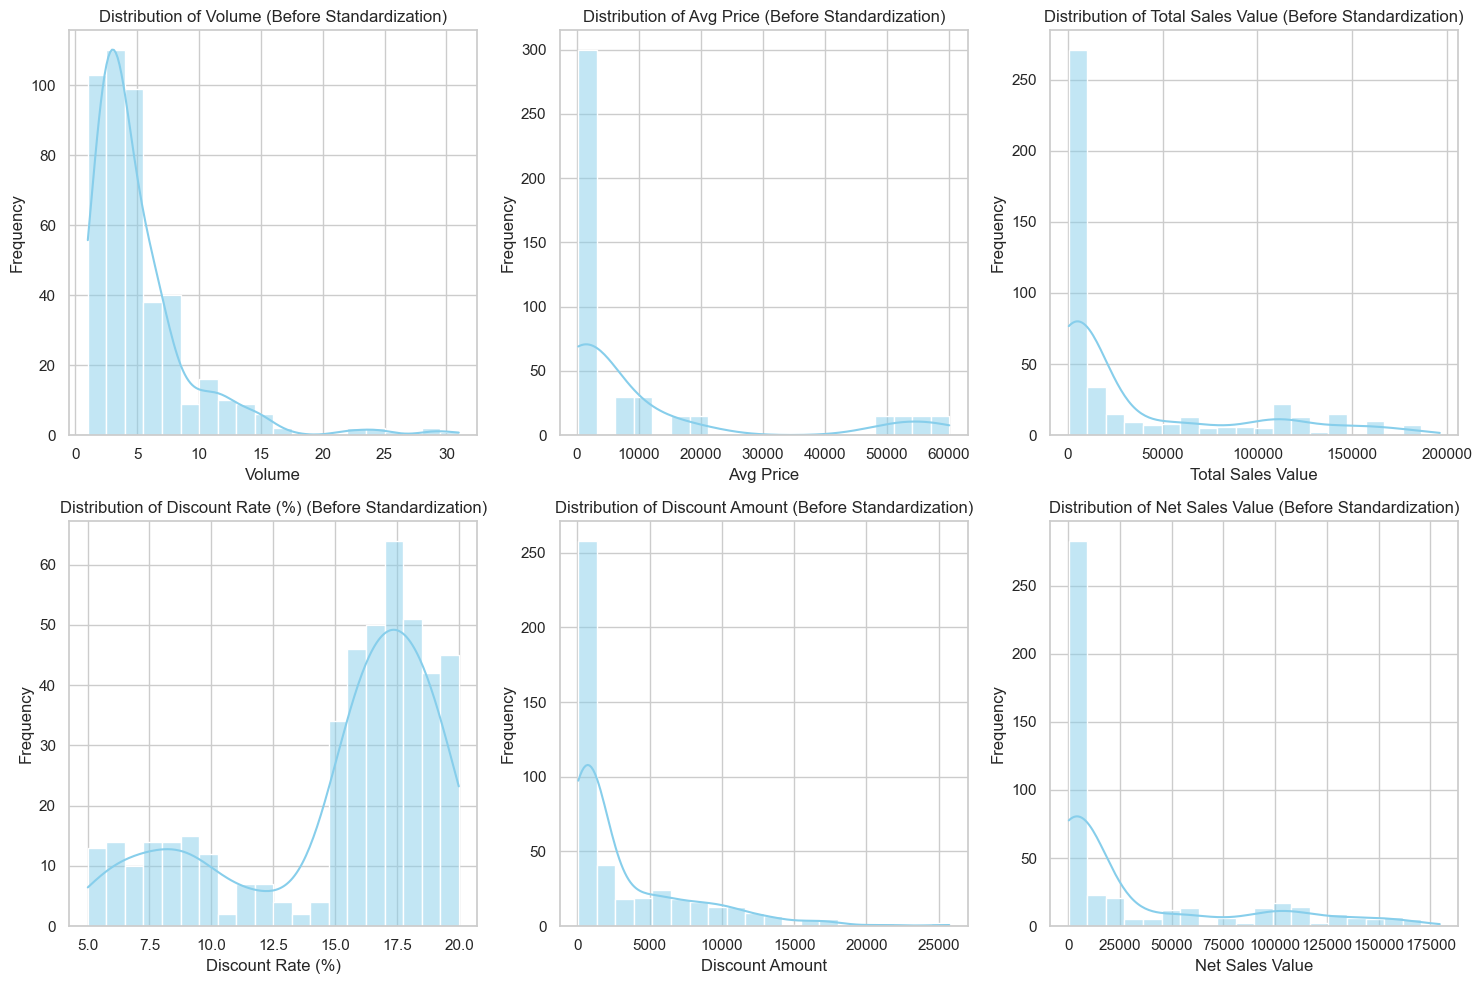

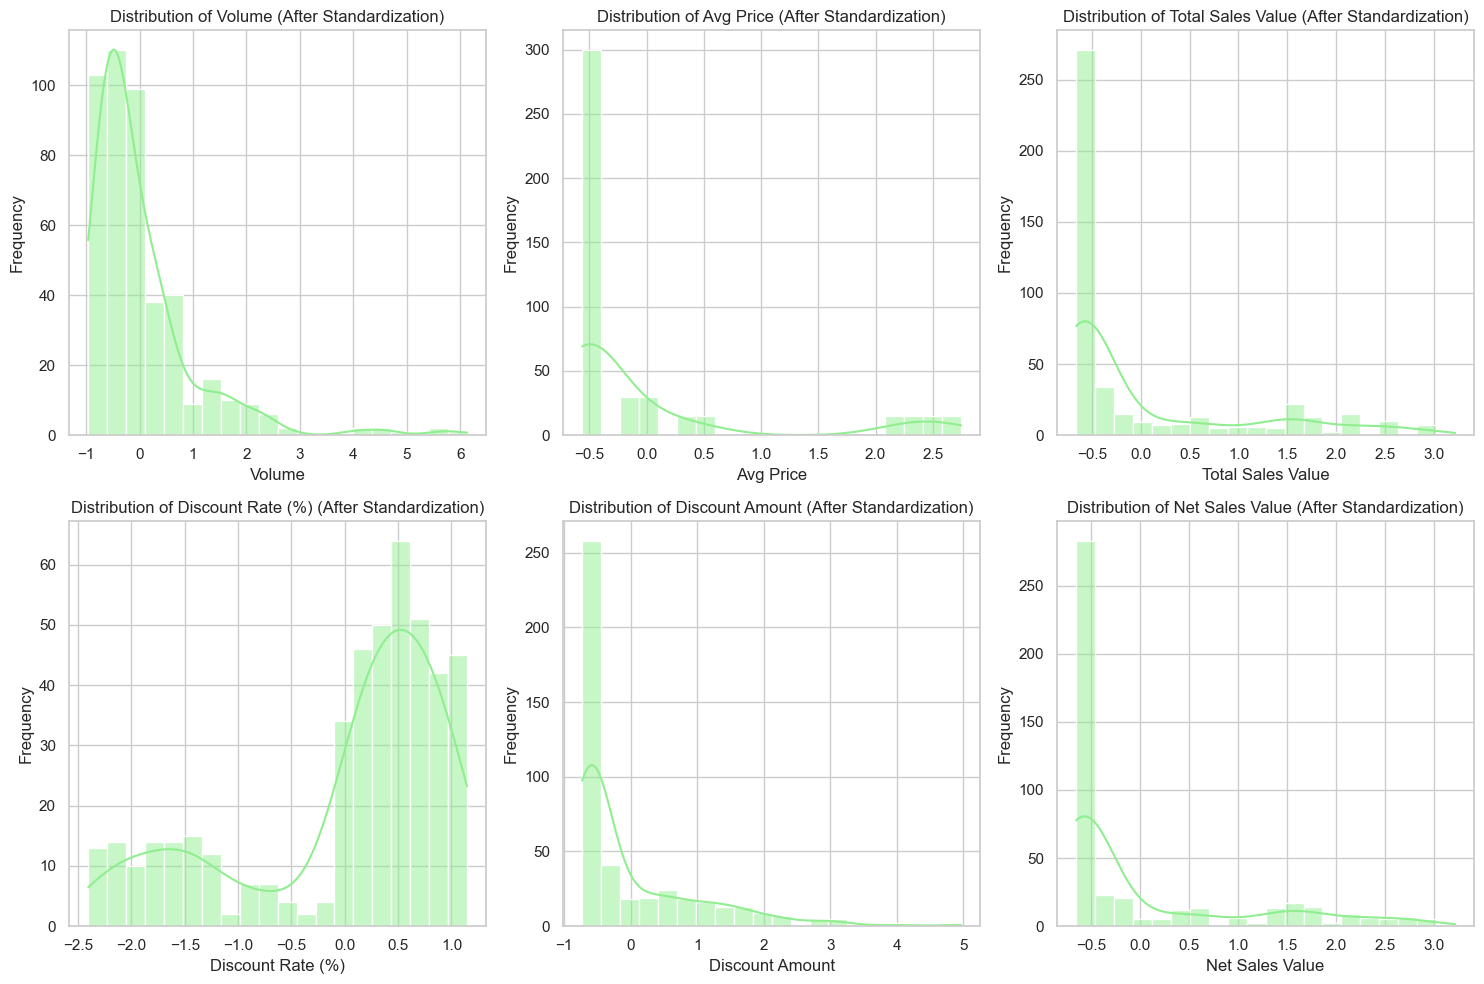

In [153]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {column} (Before Standardization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Standardization
data_standardized = data.copy()  # Create a copy of the original data
for column in numerical_columns:
    mu = data[column].mean()
    sigma = data[column].std()
    data_standardized[column] = (data[column] - mu) / sigma

# Plotting after standardization
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_standardized[column], bins=20, kde=True, color='lightgreen')
    plt.title(f'Distribution of {column} (After Standardization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Before Standardization: The histograms shows the original distributions of the numerical variables, which may have different scales and shapes (e.g., skewed distributions).
After Standardization: The histograms are displaying the standardized distributions, which should be centered around 0 with a standard deviation of 1. The shape of the distribution may remain similar, but the scale will be uniform.

# Conversion of Categorical Data into Dummy Variables

In [ ]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True,dtype=int)# we have used pandas libraries get_dummies function
# drop_first=True is used to avoid multicollinearity by dropping the first category of each variable.
# Display a portion of the transformed dataset
print("\nTransformed Dataset (After One-Hot Encoding):")
print(data_encoded.head())


Transformed Dataset (After One-Hot Encoding):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cr

One-hot encoding is a crucial step in preparing categorical data for machine learning models. By transforming categorical variables into a binary format, we ensure that the data is compatible with various algorithms, allowing for accurate modeling and predictions.

# conclusion 

In summary, the steps of standardization and one-hot encoding are indispensable in the data preprocessing stage. They not only enhance the quality and interpretability of the data but also significantly contribute to the success of machine learning models. By investing time in these preprocessing steps, we can ensure that our analyses are robust, accurate, and meaningful, ultimately leading to better insights and decision-making.